# Reshaping and Pivot Tables

Doc Sources: 
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html    
* https://pandas.pydata.org/pandas-docs/stable/reshaping.html

While pivot() provides general purpose pivoting with various data types (strings, numerics, etc.), pandas also provides pivot_table() for pivoting with aggregation of numeric data.

The function pivot_table() can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies.

It takes a number of arguments:

* data: a DataFrame object.
* values: a column or a list of columns to aggregate.
* index: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot * table index. If an array is passed, it is being used as the same manner as column values.
* columns: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the * pivot table column. If an array is passed, it is being used as the same manner as column values.
* aggfunc: function to use for aggregation, defaulting to numpy.mean.

In [2]:
import pandas as pd
import numpy as np

In [52]:
# One best practice is to ask questions about the dataset before moving into modeling:

# * what age group does have more balance or any other interesting column.
# * what AGE group have the most balance of the cards/accounts. 
# * etc.

In [51]:
# read in the csv file aka dataframe creation

url_data = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/data.csv"
data = pd.read_csv(url_data,sep=',') # for specify the index we use here the colums "0" when reading the data: , index_col=0

In [54]:
#check the dataframe shape.

print(data.shape) # to can get the shape of our dataframe, so we have 1k observations and 11 columns(variables)

print(data.head()) # to can see the top 5 observations from our dataset

print(data.describe())

(1000, 11)
   Unnamed: 0  MATCHKEY  RBAL  TRADES  AGE AGE_groups  DELQID  CRELIM  \
0           0  16345246  1492       4   39   AG_30_50       1     750   
1           1  13728016     0       3   71   AG_70_UP       0    3250   
2           2  14716776   854       9   30    AG_0_30       4     500   
3           3  14568809   408      13   28    AG_0_30       1    3000   
4           4  13513749  4965      41   51   AG_50_70       0     500   

   goodbad  BRNEW  BRAGE  
0        0      5     20  
1        0     19     19  
2        1      0     46  
3        0      2     33  
4        0      3     68  
        Unnamed: 0      MATCHKEY           RBAL      TRADES          AGE  \
count  1000.000000  1.000000e+03    1000.000000  1000.00000  1000.000000   
mean    499.500000  1.317486e+07    7402.844000    19.18300    47.634000   
std     288.819436  1.551523e+07    8755.245063    10.51999    15.551524   
min       0.000000  1.338454e+06       0.000000     1.00000    19.000000   
25%     

# Simple explanation of what is the structure of the "pivot_table" and "pivot"

* data is self explanatory - it's the DataFrame you'd like to use
* index is the column, grouper, array (or list of the previous) you'd like to group your data by. It will be displayed in the index column (or columns, if you're passing in a list)
* values (optional) is the column you'd like to aggregate. If you do not specify this then the function will aggregate all numeric columns.

In [55]:
# sort data in pandas example

data.sort_values(['AGE', "DELQID"], ascending=[True, False], inplace=True)

In [79]:
# here is sorted dataframe used for the pivot_table creation

data[['goodbad', 'AGE_groups', 'DELQID', 'TRADES']].head()

,goodbad,AGE_groups,DELQID,TRADES
329,1,AG_0_30,5,10
96,0,AG_0_30,1,7
333,1,AG_0_30,7,7
242,0,AG_0_30,2,8
47,0,AG_0_30,1,7


In [87]:
#or cab be used mean or any other numpy valid aggregation function and multiple index as well and here we don't specify the colun so be
# One way to look at our data is single index and we use values as a "count" 
# This way we are see that "bad" has 813 TRADES and "good" has 187 TRADES 

pd.pivot_table(data,index=['goodbad'], values=['TRADES'], aggfunc='count') 

,TRADES
goodbad,
0,813
1,187


# One approach of visualisation we can use as the 'count' aggregation function and we use here single index

# Another way is to use the "columns" parameter to can better display the data 

In [89]:
# use as the 'count' aggregation function and we use here single index

# Another way is to use the "columns" parameter to can better display the data 

pd.pivot_table(data, index=['goodbad'], columns=['AGE_groups'], values=['TRADES'], aggfunc='count')

TRADES                           
AGE_groups AG_0_30 AG_30_50 AG_50_70 AG_70_UP
goodbad                                      
0              131      338      265       79
1               31       96       51        9

# Other visualisation we can use as the 'count' aggregation function and we use here single index and 2 or more columns passed to 'values' parameter. 


In [90]:
# use as the 'count' aggregation function and we use here single index and 2 or more columns passed to 'values' parameter. 


pd.pivot_table(data, index=['goodbad'], columns=['AGE_groups'], values=['BRNEW', 'BRAGE'], aggfunc='count')

BRAGE                              BRNEW                    \
AGE_groups AG_0_30 AG_30_50 AG_50_70 AG_70_UP AG_0_30 AG_30_50 AG_50_70   
goodbad                                                                   
0              131      338      265       79     131      338      265   
1               31       96       51        9      31       96       51   

                     
AGE_groups AG_70_UP  
goodbad              
0                79  
1                 9

In [91]:
# use the 'sum' as the aggregation function by using multiple index:

pd.pivot_table(data, index=['goodbad', 'AGE_groups'], columns=['DELQID'], values='TRADES',  aggfunc=np.sum)

DELQID                   0       1      2      3      4      5      6       7
goodbad AGE_groups                                                           
0       AG_0_30     1210.0   458.0  196.0    NaN    NaN    NaN    NaN     NaN
        AG_30_50    4409.0  1604.0  366.0    NaN    NaN    NaN    NaN     NaN
        AG_50_70    4122.0  1325.0  298.0    NaN    NaN    NaN    NaN     NaN
        AG_70_UP    1220.0   154.0  134.0    NaN    NaN    NaN    NaN     NaN
1       AG_0_30        NaN     NaN    NaN   59.0   22.0   59.0   18.0   209.0
        AG_30_50       NaN     NaN    NaN  185.0  293.0  249.0  127.0  1085.0
        AG_50_70       NaN     NaN    NaN  202.0  111.0  284.0   83.0   465.0
        AG_70_UP       NaN     NaN    NaN   22.0    NaN   13.0    NaN   201.0

In [92]:
#using the 'np.mean' as the aggregation function by using multiple index:

pd.pivot_table(data, index=['goodbad', 'AGE_groups'], columns=['DELQID'], values='TRADES',  aggfunc=np.mean)

DELQID                      0          1          2          3          4  \
goodbad AGE_groups                                                          
0       AG_0_30     14.235294  13.470588  16.333333        NaN        NaN   
        AG_30_50    18.603376  19.802469  18.300000        NaN        NaN   
        AG_50_70    21.809524  22.083333  18.625000        NaN        NaN   
        AG_70_UP    18.769231  22.000000  19.142857        NaN        NaN   
1       AG_0_30           NaN        NaN        NaN  19.666667   7.333333   
        AG_30_50          NaN        NaN        NaN  18.500000  18.312500   
        AG_50_70          NaN        NaN        NaN  25.250000  27.750000   
        AG_70_UP          NaN        NaN        NaN  22.000000        NaN   

DELQID                      5          6          7  
goodbad AGE_groups                                   
0       AG_0_30           NaN        NaN        NaN  
        AG_30_50          NaN        NaN        NaN  
        AG_50_70          NaN        NaN        NaN  
        AG_70_UP          NaN        NaN        NaN  
1       AG_0_30     14.750000   9.000000  11.000000  
        AG_30_50    22.636364  18.142857  20.865385  
        AG_50_70    28.400000  27.666667  17.884615  
        AG_70_UP    13.000000        NaN  28.714286

# Create a pivot table of group score counts, by goodbad and AGE_groups

In [93]:
#or cab be used mean or any other numpy valid aggregation function and multiple index as well and here we don't specify the colun so be


pd.pivot_table(data,index=['goodbad','AGE_groups'], values=["TRADES"], aggfunc='count') 

TRADES
goodbad AGE_groups        
0       AG_0_30        131
        AG_30_50       338
        AG_50_70       265
        AG_70_UP        79
1       AG_0_30         31
        AG_30_50        96
        AG_50_70        51
        AG_70_UP         9

In [94]:
pd.pivot_table(data,index=['goodbad','AGE_groups'], values=["TRADES"], aggfunc=np.sum)

TRADES
goodbad AGE_groups        
0       AG_0_30       1864
        AG_30_50      6379
        AG_50_70      5745
        AG_70_UP      1508
1       AG_0_30        367
        AG_30_50      1939
        AG_50_70      1145
        AG_70_UP       236

In [115]:

rbal_tabled = pd.pivot_table(data,index=['goodbad','AGE_groups'],values=["RBAL"], aggfunc=np.sum)
rbal_tabled

RBAL
goodbad AGE_groups         
0       AG_0_30      554413
        AG_30_50    2211399
        AG_50_70    2467394
        AG_70_UP     640988
1       AG_0_30      146351
        AG_30_50     740535
        AG_50_70     561325
        AG_70_UP      80439

In [116]:
#get max value of the 'DELQID' column. 

data['DELQID'].max()

7

In [117]:
#get min value of the 'DELQID' column. 

data['DELQID'].min()

0

In [118]:
# We can bin the data and pass directly to pivot_table function and will keep the original name DELQID when visualizing the pivot_table.  

d_id = pd.cut(data['DELQID'], [0, 3, 7])
pd.pivot_table(data,index = ['goodbad', d_id], values=['RBAL'], columns=['AGE_groups'], 
              aggfunc= [np.mean, np.median, min, max, np.std])

mean                                           median  \
                       RBAL                                             RBAL   
AGE_groups          AG_0_30     AG_30_50      AG_50_70      AG_70_UP AG_0_30   
goodbad DELQID                                                                 
0       (0, 3]  3969.478261  7430.099010   9085.934211  10069.357143  2315.0   
1       (0, 3]  8167.000000  5160.500000  15136.875000  23259.000000  9479.0   
        (3, 7]  4351.785714  8010.813953  10237.906977   7147.500000  1739.5   

                                              min                             \
                                             RBAL                              
AGE_groups     AG_30_50 AG_50_70 AG_70_UP AG_0_30 AG_30_50 AG_50_70 AG_70_UP   
goodbad DELQID                                                                 
0       (0, 3]   5143.0   6384.0   7571.0       0        0        0      863   
1       (0, 3]   4222.5   9239.5  23259.0    2591     1415     3193    23259   
        (3, 7]   4878.0   7173.0   5111.0       0        0        0     1221   

                   max                                     std               \
                  RBAL                                    RBAL                
AGE_groups     AG_0_30 AG_30_50 AG_50_70 AG_70_UP      AG_0_30     AG_30_50   
goodbad DELQID                                                                
0       (0, 3]   31113    40694    37637    36215  5264.589442  7219.715541   
1       (0, 3]   12431     9476    43215    23259  5049.495816  3065.241018   
        (3, 7]   38705    34026    45530    19012  7458.273633  7683.094896   

                                           
                                           
AGE_groups          AG_50_70     AG_70_UP  
goodbad DELQID                             
0       (0, 3]   8678.932466  9265.538787  
1       (0, 3]  13961.027013          NaN  
        (3, 7]  10661.115018  6726.429450

In [127]:
# We can bin the data and pass directly to pivot_table function and will keep the original name DELQID when visualizing the pivot_table.  

d_id = pd.cut(data['DELQID'], [0, 1, 2, 3, 4, 5, 6, 7])
rbal_crelim_tabled = pd.pivot_table(data,index = ['goodbad', d_id], columns=['AGE_groups'], values=['RBAL','CRELIM'],
                                    aggfunc={'RBAL': np.mean,
                                             'CRELIM': [min, max, np.mean]},fill_value=0) # fill_value=0 does fil NA with 0

In [128]:
rbal_crelim_tabled

CRELIM                                                       \
                   max                                    mean                
AGE_groups     AG_0_30 AG_30_50 AG_50_70 AG_70_UP      AG_0_30     AG_30_50   
goodbad DELQID                                                                
0       (0, 1]    5750    10000    10000     2000  1734.441176  2411.641975   
        (1, 2]    2500     4000     3250     3500   766.666667  1550.000000   
1       (2, 3]    2750     2275     3500     4000  1833.333333  1283.300000   
        (3, 4]    2000     4250     5500        0  1333.333333  1459.937500   
        (4, 5]    3400     5700     3750     1000  2125.000000  2202.181818   
        (5, 6]     500     4250     1750        0   500.000000  2000.000000   
        (6, 7]    5650     4500     5250     3000  1626.684211  1662.057692   

                                                                             \
                                             min                              
AGE_groups         AG_50_70     AG_70_UP AG_0_30 AG_30_50 AG_50_70 AG_70_UP   
goodbad DELQID                                                                
0       (0, 1]  2543.250000  1278.571429     300      500        0        0   
        (1, 2]  1365.375000  2164.285714     300        0      300        0   
1       (2, 3]  1494.375000  4000.000000     500      400      600     4000   
        (3, 4]  3812.500000     0.000000     500      400     1750        0   
        (4, 5]  1965.000000  1000.000000    1000      500        0     1000   
        (5, 6]  1153.333333     0.000000     500     1000      710        0   
        (6, 7]  1906.846154  1235.714286     300      300      350      300   

                       RBAL                                            
                       mean                                            
AGE_groups          AG_0_30      AG_30_50      AG_50_70      AG_70_UP  
goodbad DELQID                                                         
0       (0, 1]  4202.647059   7761.493827   9550.883333   5945.285714  
        (1, 2]  3308.833333   6087.950000   7342.375000  14193.428571  
1       (2, 3]  8167.000000   5160.500000  15136.875000  23259.000000  
        (3, 4]  3972.666667   5797.812500  22979.500000      0.000000  
        (4, 5]  4012.750000  12159.636364  12647.000000   2846.000000  
        (5, 6]  1367.500000   4095.714286   6427.666667      0.000000  
        (6, 7]  4797.157895   8341.134615   7790.730769   7762.000000

# Advanced pivot_table Filtering

In [129]:
rbal_crelim_tabled.query('goodbad == ["0"]')

CRELIM                                                       \
                   max                                    mean                
AGE_groups     AG_0_30 AG_30_50 AG_50_70 AG_70_UP      AG_0_30     AG_30_50   
goodbad DELQID                                                                
0       (0, 1]    5750    10000    10000     2000  1734.441176  2411.641975   
        (1, 2]    2500     4000     3250     3500   766.666667  1550.000000   

                                                                          \
                                          min                              
AGE_groups      AG_50_70     AG_70_UP AG_0_30 AG_30_50 AG_50_70 AG_70_UP   
goodbad DELQID                                                             
0       (0, 1]  2543.250  1278.571429     300      500        0        0   
        (1, 2]  1365.375  2164.285714     300        0      300        0   

                       RBAL                                          
                       mean                                          
AGE_groups          AG_0_30     AG_30_50     AG_50_70      AG_70_UP  
goodbad DELQID                                                       
0       (0, 1]  4202.647059  7761.493827  9550.883333   5945.285714  
        (1, 2]  3308.833333  6087.950000  7342.375000  14193.428571

# Visualizing the pivot_table by using matplotlib and Seaborn


Text(0,0.5,'Revolving Balance')

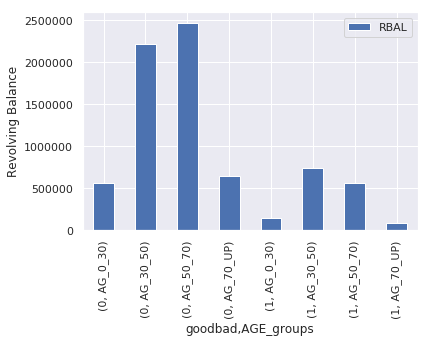

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()  

pd.pivot_table(data, index=['goodbad','AGE_groups'],values=["RBAL"], aggfunc=np.sum).plot(kind= 'bar')
plt.ylabel("Revolving Balance")

# here we can see what age group does have the most RBAL and by visualizing we can get a feel of the groups containing the most Balance

# Q&A